In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
df=pd.read_csv("knn_data.csv")
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
df=df.drop("Unnamed: 0", axis=1)

In [4]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

### Split Dataset

In [10]:
np.random.seed(42)

X=df.drop("TARGET CLASS",axis=1)
y=df["TARGET CLASS"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Scale dataset

In [12]:
scaler=StandardScaler()

X_train_transform= scaler.fit_transform(X_train)
X_test_transform=scaler.transform(X_test)

In [13]:
X_train_transform

array([[ 1.53273758,  0.30624156, -0.22581176, ..., -1.97704878,
         0.74304032,  0.21114601],
       [ 0.15016334,  0.00471871, -0.75949409, ..., -0.21195386,
        -0.11871795,  1.6213478 ],
       [ 0.4020486 , -0.75676342, -0.08196763, ..., -0.46057037,
         0.16210862,  0.06697774],
       ...,
       [-1.04368993,  1.24074244,  0.37361947, ...,  0.13512371,
        -1.51178856,  0.82735023],
       [ 0.88459574,  0.80085698, -0.80244713, ...,  0.07281615,
        -1.35330418,  0.927681  ],
       [ 0.98124649,  1.86397424, -1.05140981, ..., -0.38249558,
        -0.24115381, -0.28647146]])

In [16]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_transform,y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.score(X_test_transform,y_test)

0.94

In [18]:
   
def knc(x):
    knn=KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train_transform,y_train)
    return knn.score(X_test_transform,y_test)

score=[]

for i in range(1,50):
    score.append(knc(i))
    
 
     
        
    

In [19]:
print(score)

[0.94, 0.935, 0.945, 0.95, 0.955, 0.95, 0.945, 0.945, 0.955, 0.96, 0.955, 0.96, 0.955, 0.965, 0.945, 0.96, 0.955, 0.955, 0.955, 0.955, 0.955, 0.95, 0.955, 0.95, 0.95, 0.95, 0.95, 0.945, 0.945, 0.95, 0.945, 0.95, 0.94, 0.94, 0.945, 0.945, 0.945, 0.945, 0.945, 0.94, 0.945, 0.94, 0.94, 0.94, 0.94, 0.94, 0.945, 0.945, 0.945]


## Visualize knn score

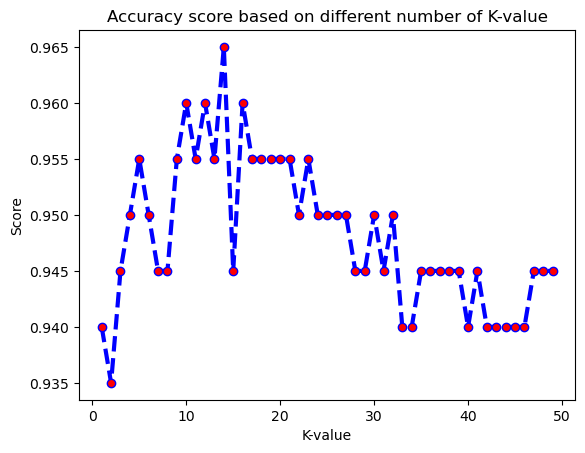

In [29]:
plt.plot(range(1,50),score,lw=3,color="blue",marker="o",markersize=6,linestyle="dashed",markerfacecolor="red")
plt.title("Accuracy score based on different number of K-value")
plt.xlabel("K-value")
plt.ylabel("Score")
plt.show()

In [30]:
knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train_transform,y_train)
knn.score(X_test_transform,y_test)


0.965

In [31]:
y_pred=knn.predict(X_test_transform)

In [32]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1], dtype=int64)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        98
           1       0.98      0.95      0.97       102

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



Visualize truth and predict value

In [34]:
d={ "Predicted":y_pred,
       "Actual":y_test   
}

data=pd.DataFrame(d)
data.value_counts()


Predicted  Actual
1          1         97
0          0         96
           1          5
1          0          2
dtype: int64

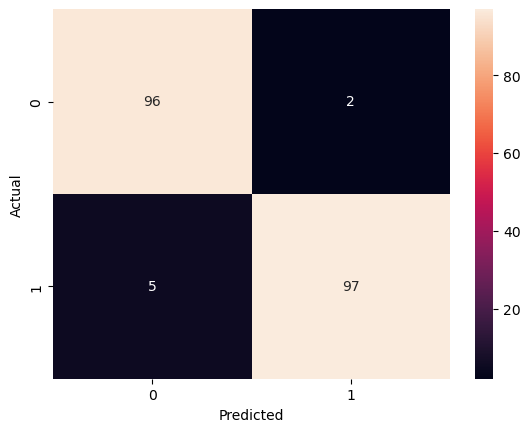

In [41]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()